In [1]:
#load package
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

[ Info: Precompiling Nevanlinna [0b21cfa8-e591-48a4-a07b-a9d20be7c264]


In [2]:
# Set work data Type
T = BigFloat
setprecision(2048)
;

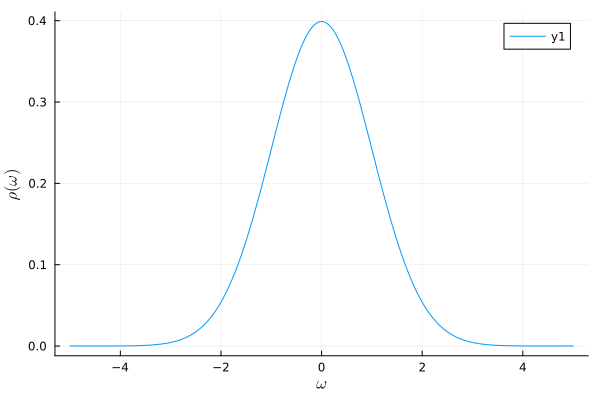

In [3]:
#define spectral function
gaussian(x, mu, sigma) = exp(-0.5*((x-mu)/sigma)^2)/(sqrt(2*π)*sigma)
rho(omega) = gaussian(omega, 0.0, 1.0)
#rho(omega) = 0.5*gaussian(omega, 2.0, 1.0) + 0.5*gaussian(omega, -2.0, 1.0)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [7]:
moments = Complex{T}.([1, 0, 1, 0, 3, 0, 15, 0, 105, 0, 945])
#moments = Complex{T}.([1, 0, 1])
#moments = Complex{T}.([1])

#moments = Complex{T}.([1, 0, 5, 0, 43, 0, 499, 0, 7193, 0, 123109, 0, 2430355, 0, 54229907])
#moments = Complex{T}.([1, 0, 5, 0, 43])

11-element Vector{Complex{BigFloat}}:
   1.0 + 0.0im
   0.0 + 0.0im
   1.0 + 0.0im
   0.0 + 0.0im
   3.0 + 0.0im
   0.0 + 0.0im
  15.0 + 0.0im
   0.0 + 0.0im
 105.0 + 0.0im
   0.0 + 0.0im
 945.0 + 0.0im

In [8]:
wo_ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

Rank of Hankel matrix:6
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 25
max_theta=0.0
hardy optimization was success.


In [9]:
#Nevanlinna.calc_PQGD.(ham_nev_sol.nev_struct.reals.freq,ham_nev_sol.p, ham_nev_sol.q, ham_nev_sol.gamma, ham_nev_sol.delta)

In [10]:
ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=true)

Rank of Hankel matrix:6
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 25
H=1
Iter     Function value   Gradient norm 
     0     5.656936e+00     1.448500e+00
 * time: 0.01912713050842285
     1     5.651380e+00     2.022780e+00
 * time: 2.937944173812866
     2     5.594480e+00     6.798103e-01
 * time: 6.718029975891113
     3     5.593566e+00     8.031201e-02
 * time: 8.712448120117188
     4     5.593552e+00     1.377626e-02
 * time: 9.943662166595459
     5     5.593552e+00     1.767426e-03
 * time: 11.408117055892944
     6     5.593552e+00     2.351824e-04
 * time: 13.466674089431763
     7     5.593552e+00     2.346937e-05
 * time: 14.958582162857056
     8     5.593552e+00     4.793037e-06
 * time: 16.845316171646118
     9     5.593552e+00     7.893659e-07
 * time: 18.762431144714355
    10     5.593552e+00     6.688005e-08
 * time: 20.031219959259033
    11     5.593552e+00     1.036693e-08
 * time: 21.987940073013306
    12  

Nevanlinna.HamburgerNevanlinnaSolver{BigFloat}(Complex{BigFloat}[1.0 + 0.0im, 0.0 + 0.0im, 1.0 + 0.0im, 0.0 + 0.0im, 3.0 + 0.0im, 0.0 + 0.0im, 15.0 + 0.0im, 0.0 + 0.0im, 105.0 + 0.0im, 0.0 + 0.0im, 945.0 + 0.0im], 11, 6, 6, 6, true, false, true, false, Complex{BigFloat}[-14.9999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999946 - 0.0im, -0.125000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [11]:
Nevanlinna.solve!(ham_nev_sol)

H=1
Iter     Function value   Gradient norm 
     0     5.593552e+00     2.927922e-09
 * time: 0.0002129077911376953
max_theta=0.0373281048128413448067418967737851784637893559573123270753461671501977014612488510078247392731508319368114154204051496925477075983401589204162969308792868288851300957258674292700019170216412621487370428066175034269047141610283659491444913259068467456501328390625090215890962414012980854288998624426782607336807867106697482843195520277684695157608918885531351852524705626712552265484121639349644830681412657937943322250275030881504075440763425180653807691640356220610921686233821698662797365795550042831187434546651676148424338392323749910319160714748829634929916325754446873765105347470080649735079511749434885226328708
hardy optimization was success.
max_theta=0.037328104812841344806741896773785178463789355957312327075346167150197701461248851007824739273150831936811415420405149692547707598340158920416296930879286828885130095725867429270001917021641262148737042806617

    22     5.553847e+00     1.986842e-07
 * time: 36.9490110874176
    23     5.553847e+00     6.952678e-08
 * time: 38.42885708808899
    24     5.553847e+00     2.096187e-08
 * time: 39.92114615440369
max_theta=0.157791779413569493632299538221464501602816914175706483837547231115752358088616154409158680187306583469834703439051380314211099655189398155923402648595506622106846044313829289199895320393973870127897280311138361637556064986025617290089118522339389738514603727484837793489634693650882980993046269508129624419840103666672915879119390067290062543007941903343128094836876910405394837636839894332172349656122219699055579992669269480973129282446930543048032260339787724746802985963677432604499803367539464614472522239469040732474632508910393576611624979647679908694526712516030564043236475227067067534763877805082771820361228
hardy optimization was success.
max_theta=0.15779177941356949363229953822146450160281691417570648383754723111575235808861615440915868018730658346983470343905138031421

max_theta=0.302895905717461151082959052242394834488468171306102732401319377939650943612196741962163243653961275694409996047442706081589364026274301180743280436137858364905349400603968772469553832849023819832967639887552574272789729536005129385949850012731252040437913886475926863034016318481592528494285636037855629887718547971347767136969265616934860871737048271761428104874492193825115396376249793135663563776885992317139714936040828735604993149436374302060526677578580771468695746161112944038574625283411282048336127703182388966736819197839714675527858121057554088874599971298354801351940643893065200327843003530321860684415152
hardy optimization was success.
H=7
Iter     Function value   Gradient norm 
     0     5.550009e+00     1.022779e-01
 * time: 0.00022077560424804688
     1     5.549971e+00     1.102950e-01
 * time: 1.4464738368988037
     2     5.549945e+00     1.119777e-01
 * time: 3.152017831802368
     3     5.549926e+00     9.639818e-02
 * time: 4.873211860656738
     4     5.5

    39     5.534464e+00     7.152467e-02
 * time: 76.96803188323975
    40     5.534432e+00     3.896064e-02
 * time: 78.50868201255798
    41     5.534412e+00     3.627698e-02
 * time: 80.06423497200012
    42     5.534397e+00     1.316802e-02
 * time: 81.63088607788086
    43     5.534388e+00     9.170062e-03
 * time: 83.2673020362854
    44     5.534380e+00     1.754436e-02
 * time: 85.61770701408386
    45     5.534376e+00     1.423276e-02
 * time: 87.23858404159546
    46     5.534374e+00     1.107882e-02
 * time: 89.64512491226196
    47     5.534373e+00     6.103645e-03
 * time: 91.25969696044922
    48     5.534372e+00     6.092341e-03
 * time: 92.91448187828064
    49     5.534372e+00     1.442774e-03
 * time: 94.74775791168213
    50     5.534372e+00     1.594310e-03
 * time: 96.57898998260498
    51     5.534372e+00     2.957930e-03
 * time: 98.60863304138184
    52     5.534372e+00     1.574888e-03
 * time: 100.684406042099
    53     5.534372e+00     9.802292e-04
 * time: 

    47     4.187084e+00     1.285748e+00
 * time: 103.74493217468262
    48     4.047517e+00     1.157418e+00
 * time: 108.04979014396667
    49     3.909308e+00     1.394893e+00
 * time: 110.65482521057129
    50     3.818775e+00     1.502830e+00
 * time: 113.74877119064331
    51     3.756873e+00     1.532724e+00
 * time: 116.31405901908875
    52     3.707452e+00     1.532245e+00
 * time: 118.92444610595703
    53     3.624035e+00     1.583688e+00
 * time: 121.26007413864136
    54     3.579845e+00     1.607398e+00
 * time: 123.79166412353516
    55     3.534387e+00     1.461247e+00
 * time: 125.4246461391449
    56     3.376490e+00     1.254317e+00
 * time: 126.95702505111694
    57     3.275045e+00     8.389197e-01
 * time: 128.54144406318665
    58     3.211977e+00     8.978944e-01
 * time: 130.08855605125427
    59     3.136898e+00     8.007937e-01
 * time: 131.61134219169617
    60     3.097414e+00     8.429618e-01
 * time: 133.15975403785706
    61     3.056464e+00     6.71781

   167     1.830059e-01     9.779561e-01
 * time: 442.5329120159149
   168     1.793812e-01     8.703614e-01
 * time: 444.73401403427124
   169     1.689544e-01     3.061422e-01
 * time: 446.31132102012634
   170     1.362256e-01     1.101015e+00
 * time: 448.6852180957794
   171     1.273566e-01     1.085143e+00
 * time: 451.7394120693207
   172     1.114833e-01     1.440510e+00
 * time: 454.1038091182709
   173     8.632074e-02     1.934268e+00
 * time: 455.6083071231842
   174     6.551534e-02     2.009167e+00
 * time: 457.14799308776855
   175     4.554825e-02     6.031266e-01
 * time: 459.47466921806335
   176     3.159195e-02     7.127221e-01
 * time: 461.73087215423584
   177     2.299610e-02     4.453470e-01
 * time: 464.02057218551636
   178     2.064918e-02     1.281734e-01
 * time: 466.2716941833496
   179     1.953583e-02     1.378364e-01
 * time: 468.7178339958191
   180     1.918524e-02     7.589712e-02
 * time: 471.1194200515747
   181     1.892497e-02     1.488688e-01
 

max_theta=5.81825867730431007403757487759498528022245750871036063899005306547687596592599476059791499341508013625941123859563420117151656931676359639591572472802456621938478990644362201174010098723496097136410308539351587381307764295441766941811065181976970406960754341371680666758291103371271509677702506309451873317170914675785295496776950971226772249121612961451354568709587295042372735534405263627910640676899844184157661333233706318444763391845572466737627495373631306007500715280153874631384469503005560861642554394893047286351774743523610490203628322993216669494588465902918477115071211959134493774744274811197163284867092
hardy optimization was failure.


In [12]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 29


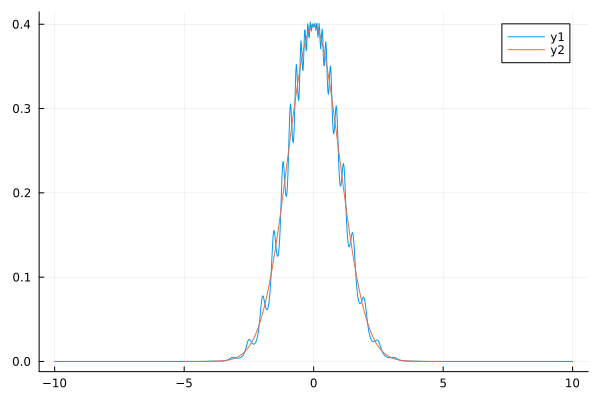

In [21]:
plot()
#plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
plot!(Float64.(real.((wo_ham_nev_sol.nev_struct.reals.freq))), Float64.(imag.(wo_ham_nev_sol.val))/pi)
#plot!(Float64.(real.((ham_nev_sol.nev_struct.reals.freq))), Float64.(imag.(ham_nev_sol.val))/pi)
plot!(omegas, rho.(omegas))
#savefig("picture.png")

In [14]:
plot(xlim = [-6,6],
    legend = :topright,
    #ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
plot!(ylabel=latexstring("\\rho"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
#savefig("two_peak.svg")

LoadError: UndefVarError: sol not defined